INTRODUÇÃO:


Será explorados dados do arquivo obesity.csv, disponibilizado pelo www.kaggle.com, a base de dados pode ser acessado através deste link: https://www.kaggle.com/datasets/muhramasaputra/obesity-based-on-eating-habits-and-physical-cond.
Os dados estão em formato CSV e contém informações sobre o número de obesidade com base em hábitos alimentares e condição física, estamos interessado em explicar a última coluna "Nobeyesdad" quê indica que pessoas com (NObeyesdad = 0) seja pessoas não obesa e (NObeyesdad = 1) pessoas obesas ou seja queremos entender o motivo ao qual leva as pessoas terem obesidade baseado nos seus atos alimentares, atividades fisicas e etc.

Descrição do dados logo abaixo: 

    O gênero é 1 se o entrevistado for do sexo masculino e 0 se o entrevistado for do sexo feminino.
    Idade é a idade do entrevistado em anos.
    family_history_with_overweight é 1 se um entrevistado tem um membro da família que está ou estava acima do peso, 0 se não.
    FAVC é 1 se um entrevistado come alimentos com alto teor calórico com frequência, 0 se não.
    O FCVC é 1 se o entrevistado costuma comer vegetais nas refeições, 0 caso contrário.
    O NCP representa quantas refeições principais um entrevistado faz diariamente (0 para 1-2 refeições, 1 para 3 refeições e 2 para mais de 3 refeições).
    CAEC representa a quantidade de comida que um entrevistado ingere entre as refeições em uma escala de 0 a 3.
    SMOKE é 1 se o entrevistado fuma, 0 se não.
    CH2O representa quanta água um entrevistado bebe em uma escala de 0 a 2.
    O SCC é 1 se um entrevistado monitora sua ingestão calórica, 0 caso contrário.
    FAF representa quanta atividade física um entrevistado faz em uma escala de 0 a 3.
    TUE representa quanto tempo um entrevistado passa olhando para dispositivos com telas em uma escala de 0 a 2.
    CALC representa a frequência com que um entrevistado bebe álcool em uma escala de 0 a 3.
    Automóvel , Bicicleta , Moto , Transporte Público e Caminhada indicam o principal meio de transporte do entrevistado. Seu principal meio de transporte é indicado por 1 e as outras colunas conterão 0.
    NObeyesdad é 1 se o paciente for obeso e 0 se não for.

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as  np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

In [2]:
df_obesidade = pd.read_csv('arquivo_obesidade.csv')

In [3]:
df_obesidade

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,0,0,1,0,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0,0,1,0,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,0,0,1,0,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,0,0,0,1,0
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1


In [4]:
df_obesidade.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,2111.0,0.505921,0.500083,0.0,0.000000,1.000000,1.000000,1.0
Age,2111.0,24.312600,6.345968,14.0,19.947192,22.777890,26.000000,61.0
family_history_with_overweight,2111.0,0.817622,0.386247,0.0,1.000000,1.000000,1.000000,1.0
FAVC,2111.0,0.883941,0.320371,0.0,1.000000,1.000000,1.000000,1.0
FCVC,2111.0,2.419043,0.533927,1.0,2.000000,2.385502,3.000000,3.0
NCP,2111.0,2.685628,0.778039,1.0,2.658738,3.000000,3.000000,4.0
CAEC,2111.0,1.140692,0.468543,0.0,1.000000,1.000000,1.000000,3.0
SMOKE,2111.0,0.020843,0.142893,0.0,0.000000,0.000000,0.000000,1.0
CH2O,2111.0,2.008011,0.612953,1.0,1.584812,2.000000,2.477420,3.0
SCC,2111.0,0.045476,0.208395,0.0,0.000000,0.000000,0.000000,1.0


Quais colunas representam variáveis categóricas e quais são numéricas?

In [5]:
#todas as colunas é composto por dados númericos
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

A base possui valores ausentes?

In [6]:
#não possui valores nulos
df_obesidade.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64

In [7]:
df_obesidade.nunique()

Gender                               2
Age                               1402
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
Automobile                           2
Bike                                 2
Motorbike                            2
Public_Transportation                2
Walking                              2
NObeyesdad                           2
dtype: int64

Quantas linhas e colunas existem nessa base?

In [8]:
print(f'Existe cerca de {df_obesidade.shape[0]} linha e {df_obesidade.shape[1]} colunas')

Existe cerca de 2111 linha e 19 colunas


Qual é a distribuição da idade entre as pessoas? Há outliers?

In [9]:
df_obesidade['Age'] = df_obesidade['Age'].astype(int)
dados_agrupado = df_obesidade['Age'].sort_values()

In [10]:
dados_agrupado.max() , dados_agrupado.min()

(np.int64(61), np.int64(14))

In [11]:
print(f"Mediana da idade {np.median(dados_agrupado)}")
print(f'Média da idade {np.mean(dados_agrupado)}')


Mediana da idade 22.0
Média da idade 23.972524869729988


In [12]:
distribuiçao_idade ,  classes = np.histogram(df_obesidade['Age'] ,  bins='sturges')
distribuiçao_idade, np.int64(classes)


(array([113, 832, 408, 351, 172,  76,  96,  38,  13,   3,   2,   6,   1]),
 array([14, 17, 21, 24, 28, 32, 35, 39, 42, 46, 50, 53, 57, 61]))

In [13]:
rotulos_de_dados = [f'{round(classes[i])} -  {round(classes[i + 1])}' for i in range(len(classes)-1) ]
rotulos_de_dados

['14 -  18',
 '18 -  21',
 '21 -  25',
 '25 -  28',
 '28 -  32',
 '32 -  36',
 '36 -  39',
 '39 -  43',
 '43 -  47',
 '47 -  50',
 '50 -  54',
 '54 -  57',
 '57 -  61']

In [14]:
# Função para detectar outliers usando IQR
def detectar_outliers_iqr(df):
    outliers = {}
    for coluna in df.select_dtypes(include=['number']).columns:  # Apenas colunas numéricas
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Filtra os valores fora dos limites
        outlier_values = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)][coluna]
        
        if not outlier_values.empty:
            outliers[coluna] = outlier_values.tolist()
    
    return outliers

outliers = detectar_outliers_iqr(df_obesidade)


outliers['Age']


[41,
 52,
 39,
 55,
 38,
 61,
 44,
 38,
 40,
 55,
 45,
 38,
 39,
 41,
 41,
 40,
 51,
 56,
 39,
 38,
 38,
 38,
 41,
 40,
 37,
 40,
 37,
 41,
 37,
 38,
 45,
 41,
 37,
 42,
 37,
 40,
 38,
 40,
 38,
 39,
 38,
 38,
 39,
 38,
 55,
 42,
 38,
 37,
 50,
 43,
 45,
 55,
 38,
 39,
 46,
 38,
 37,
 37,
 39,
 37,
 55,
 41,
 38,
 37,
 47,
 39,
 45,
 39,
 43,
 42,
 37,
 40,
 37,
 40,
 40,
 39,
 37,
 37,
 37,
 43,
 38,
 42,
 47,
 38,
 37,
 43,
 40,
 37,
 37,
 39,
 41,
 40,
 39,
 38,
 38,
 38,
 38,
 39,
 42,
 43,
 43,
 39,
 39,
 37,
 40,
 38,
 38,
 37,
 39,
 37,
 38,
 40,
 40,
 38,
 39,
 37,
 37,
 37,
 39,
 37,
 41,
 43,
 37,
 41,
 40,
 40,
 37,
 38,
 38,
 37,
 39,
 40,
 41,
 40,
 40,
 40,
 37,
 37,
 39,
 40,
 40,
 37,
 37,
 37,
 38,
 38,
 38]

In [15]:
cor_das_barras = '#003574'
cor_dos_parametros = '#3990d6'
cor_de_fundo = '#010022'

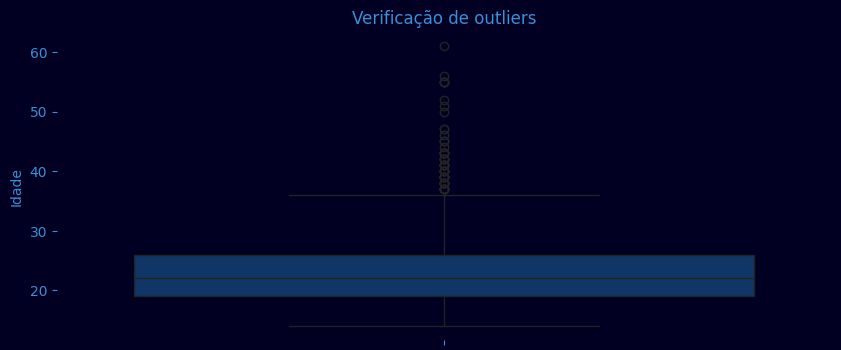

In [16]:
fig , ax = plt.subplots(figsize=(10,4))
sns.boxplot(data=df_obesidade['Age'], color=cor_das_barras)
plt.title('Verificação de outliers', color=cor_dos_parametros)
plt.yticks(fontsize=10)
plt.ylabel('Idade' , fontsize=10, color=cor_dos_parametros);
fig.patch.set_facecolor(cor_de_fundo)
ax.set_facecolor(cor_de_fundo)
ax.tick_params(colors=cor_dos_parametros)
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()


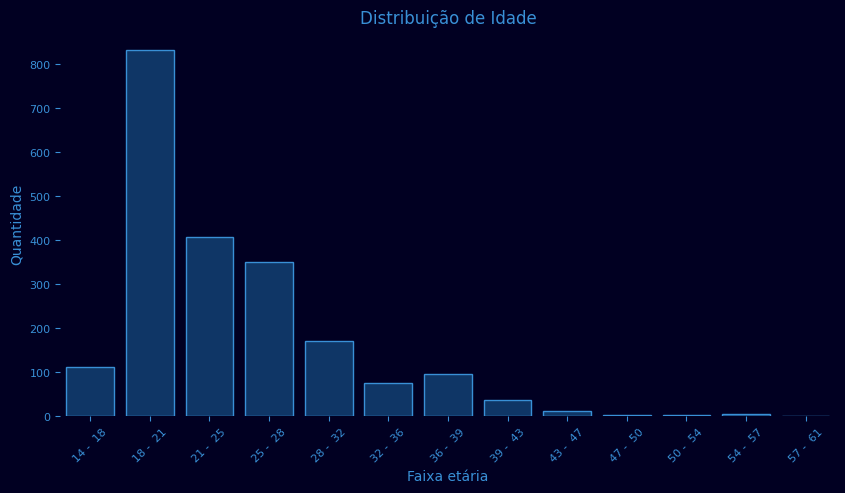

In [17]:
fig , ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=rotulos_de_dados, y=distribuiçao_idade, color=cor_das_barras)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Faixa etária', fontsize=10,color=cor_dos_parametros)
plt.ylabel('Quantidade', fontsize=10, color=cor_dos_parametros)
plt.title('Distribuição de Idade', fontsize=12, color=cor_dos_parametros)
fig.patch.set_facecolor(cor_de_fundo)
ax.set_facecolor(cor_de_fundo)
ax.tick_params(colors=cor_dos_parametros)
ax.grid(False)

for patch in ax.patches:
    patch.set_edgecolor('#3990d6')  
    patch.set_linewidth(1)  

for spine in ax.spines.values():
    spine.set_visible(False)



Existe correlação entre FAVC (frequência de consumo de comida altamente calórica) e family_history_with_overweight?

In [18]:
#A correlação dentre esses dados são bem fracas como podemos ver abaixo
df_obesidade['FAVC'].corr(df_obesidade['family_history_with_overweight'])


np.float64(0.20803550695428452)

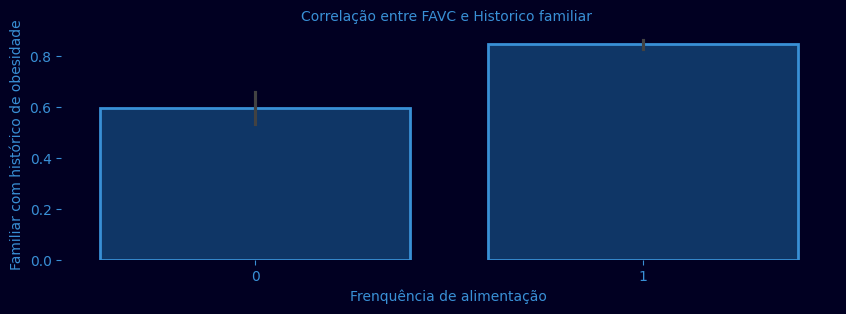

In [19]:
fig , ax = plt.subplots(figsize=(10,3))
sns.barplot(x=df_obesidade["FAVC"], y=df_obesidade["family_history_with_overweight"], color=cor_das_barras)
plt.title("Correlação entre FAVC e Historico familiar ", fontsize=10, color=cor_dos_parametros)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Frenquência de alimentação', fontsize=10, color=cor_dos_parametros)
plt.ylabel('Familiar com histórico de obesidade', fontsize=10, color=cor_dos_parametros)
fig.patch.set_facecolor(cor_de_fundo)
ax.set_facecolor(cor_de_fundo)
ax.grid(False)
ax.tick_params(colors=cor_dos_parametros)

for patch in ax.patches:
    patch.set_edgecolor('#3990d6')  
    patch.set_linewidth(2)  

for spine in ax.spines.values():
    spine.set_visible(False)



Qual é a proporção de fumantes (SMOKE) nessa base?

In [20]:
np.unique(df_obesidade['SMOKE'], return_counts=True)

(array([0, 1]), array([2067,   44]))

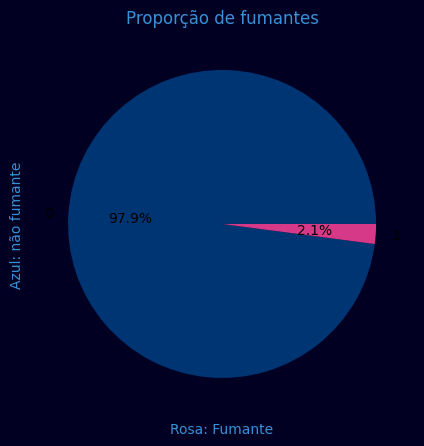

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
df_obesidade['SMOKE'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', colors=['#003574','#d63988'])
plt.title('Proporção de fumantes', color='#3990d6')
plt.ylabel('Azul: não fumante',color='#3990d6');
plt.xlabel('Rosa: Fumante', color='#3990d6')
fig.patch.set_facecolor('#010022')
ax.set_facecolor('#010022')
ax.tick_params(colors='#3990d6')
plt.show()



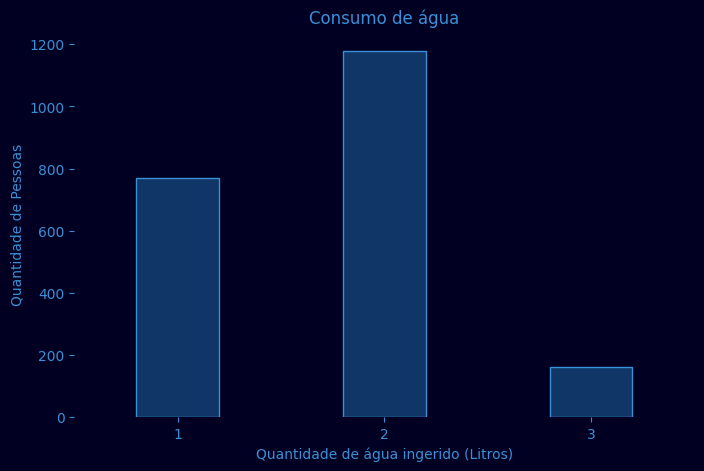

In [22]:
df_obesidade['CH2O'] = df_obesidade['CH2O'].astype(int)
agrupamento_agua = df_obesidade.groupby(['CH2O'])['CH2O'].value_counts().sort_values()
agrupamento_agua_reset = agrupamento_agua.reset_index()
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x=agrupamento_agua_reset['CH2O'], y=agrupamento_agua_reset['count'], color=cor_das_barras, width=0.4)
plt.title('Consumo de água', color=cor_dos_parametros)
plt.xlabel('Quantidade de água ingerido (Litros)', color = cor_dos_parametros)
plt.ylabel('Quantidade de Pessoas', color= cor_dos_parametros)
fig.patch.set_facecolor(cor_de_fundo)
ax.set_facecolor(cor_de_fundo)
ax.tick_params(colors=cor_dos_parametros)

ax.grid(False)
for patch in ax.patches:
    patch.set_edgecolor(cor_dos_parametros)
    
for spine in ax.spines.values():
    spine.set_visible(False)
plt.show()


A variável FAF (atividade física) está relacionada com CALC (consumo de álcool)?

In [23]:
df_obesidade['FAF'].unique(), df_obesidade['CALC'].unique()

(array([0.      , 3.      , 2.      , ..., 1.414209, 1.139107, 1.026452],
       shape=(1190,)),
 array([0, 1, 2, 3]))

valor de p: 0.00000000000000348815


CALC,0,1,2,3
FAF_cat,,,,
alta,171,181,24,0
baixa,351,853,40,1
média,117,367,6,0


A uma relação entre a coluna FAF e CALC, logo quem faz mais atividade fisica tende a consumir pouco álcool


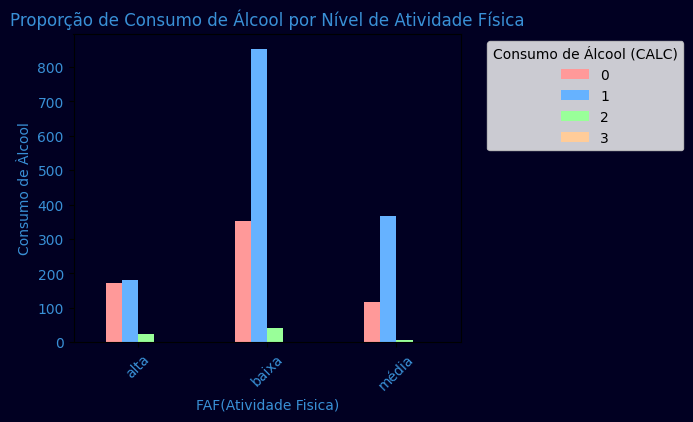

In [24]:
def categorizar_valores(dataset):

    '''Função para categorizar os valores da colua FAF ja que eles estão do tipo numerico continuo.
      Para fazermos uma relação entre as duas colunas mencionadas, precisaremos que elas esteja em categóricas '''
    
    if dataset <= 1:
        return 'baixa'
    elif dataset < 2:
        return 'média'
    else:
        return 'alta'
    
df_obesidade['FAF_cat'] =  df_obesidade['FAF'].apply(categorizar_valores)

#fazendo uma tabela de contigência para saber quantas combinações há nas duas colunas
tabela_contigencia = pd.crosstab(df_obesidade['FAF_cat'], df_obesidade['CALC'])

chi , p , dof, expeceted = chi2_contingency(tabela_contigencia)

#como o numero de P vai vim em notação cientifica, vamos transformar o valor pra deixar mais claro
tranforma_valor_de_p = np.float64(p)

print(f'valor de p: {tranforma_valor_de_p:.20f}')

display(tabela_contigencia)

if tranforma_valor_de_p < 0.5:
    print('A uma relação entre a coluna FAF e CALC, logo quem faz mais atividade fisica tende a consumir pouco álcool')
    tabela_contigencia.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'], figsize=(5,4))
    plt.gca().set_facecolor(cor_de_fundo)  # Define um cinza claro como cor de fundo
    plt.gcf().set_facecolor(cor_de_fundo)  # Define a mesma cor para o fundo da figura
    plt.title("Proporção de Consumo de Álcool por Nível de Atividade Física", color=cor_dos_parametros)
    plt.xlabel('FAF(Atividade Fisica)', fontsize=10, color=cor_dos_parametros)
    plt.ylabel('Consumo de Àlcool', fontsize=10, color=cor_dos_parametros)
    plt.xticks(rotation=45, color=cor_dos_parametros)
    plt.yticks(color=cor_dos_parametros)
    plt.legend(title="Consumo de Álcool (CALC)", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(False)
    plt.show()

else:
    print('Não há relação alguma entre essas colunas')




Quantas pessoas utilizam bicicleta (Bike)? Há alguma relação com Automobile?

In [25]:
df_obesidade['Bike'].value_counts(), df_obesidade['Automobile'].value_counts()

(Bike
 0    2104
 1       7
 Name: count, dtype: int64,
 Automobile
 0    1654
 1     457
 Name: count, dtype: int64)

In [26]:
df_obesidade['Bike'].unique(), df_obesidade['Automobile'].unique()

(array([0, 1]), array([0, 1]))

In [27]:
valores_bike , classes = np.unique(df_obesidade['Bike'], return_counts=True)
print(f'Cerca de {classes[0]} pessoas não usa Bicicleta, enquanto {classes[1]} usa bicicleta')

Cerca de 2104 pessoas não usa Bicicleta, enquanto 7 usa bicicleta


In [28]:
relaçao_bike_e_automovel = pd.crosstab(df_obesidade['Bike'], df_obesidade['Automobile'])
relaçao_bike_e_automovel

Automobile,0,1
Bike,,
0,1647,457
1,7,0


[None, None, None, None, None, None, None, None, None, None]

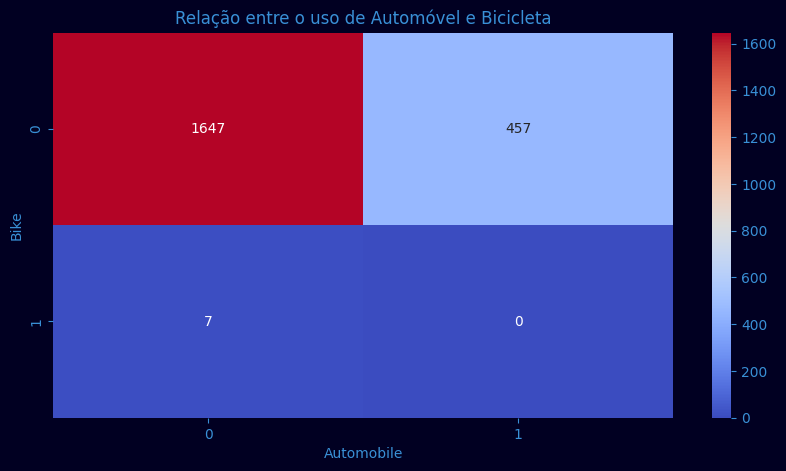

In [29]:
fig , ax = plt.subplots(figsize=(10,5))
heatmap = sns.heatmap(relaçao_bike_e_automovel, fmt='d', annot=True, cmap='coolwarm')
fig.patch.set_facecolor(cor_de_fundo)
ax.set_xlabel('Automobile', color=cor_dos_parametros)
ax.set_ylabel('Bike', color=cor_dos_parametros)
ax.tick_params(axis= 'x', colors=cor_dos_parametros)
ax.tick_params(axis='y', colors=cor_dos_parametros)
ax.set_title('Relação entre o uso de Automóvel e Bicicleta', color=cor_dos_parametros)
colorbar = heatmap.collections[0].colorbar
colorbar.ax.yaxis.set_tick_params(color=cor_dos_parametros)
plt.setp(plt.getp(colorbar.ax.axes, 'yticklabels'), color=cor_dos_parametros)

In [30]:
contigencia_B_e_A = chi2_contingency(relaçao_bike_e_automovel)
print(f'p: {contigencia_B_e_A[1]}. Como o valor de p é maior que 0.5 que usamos pra interpretação, então não há relação alguma entre as tabela ')

p: 0.3506111869156714. Como o valor de p é maior que 0.5 que usamos pra interpretação, então não há relação alguma entre as tabela 


In [31]:
dados_feminino = df_obesidade.loc[df_obesidade['Gender'] == 0 ]
dados_masculino = df_obesidade.loc[df_obesidade['Gender'] == 1]

NObeyesdad
0    53.88303
1    46.11697
Name: proportion, dtype: float64
NObeyesdad
0    54.026217
1    45.973783
Name: proportion, dtype: float64


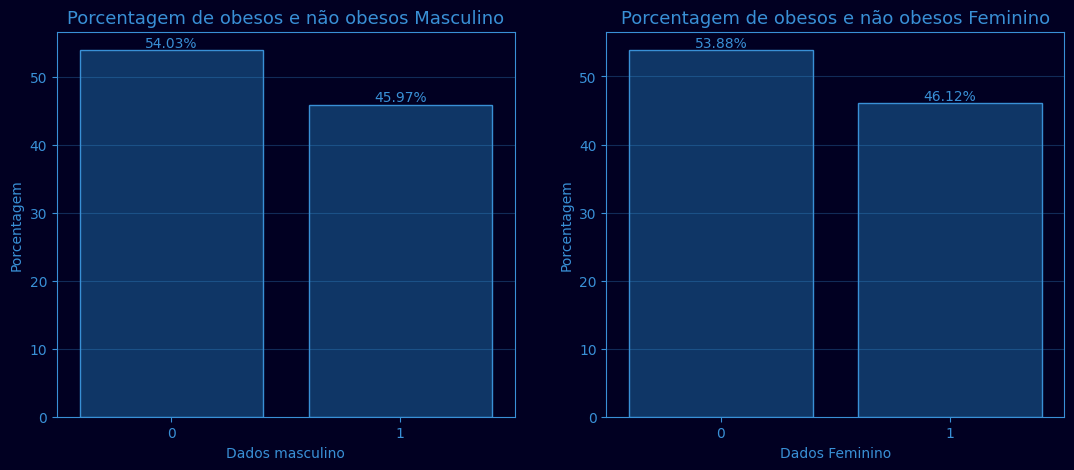

In [32]:
porcentagem_NObeyesdad_f = dados_feminino['NObeyesdad'].value_counts(normalize=True) * 100
porcentagem_NObeyesdad_m = dados_masculino['NObeyesdad'].value_counts(normalize=True) * 100

print(porcentagem_NObeyesdad_f)
print(porcentagem_NObeyesdad_m)

fig, ax = plt.subplots(1,2, figsize=(13,5))
sns.barplot(porcentagem_NObeyesdad_m, ax=ax[0], color=cor_das_barras)
fig.patch.set_facecolor(cor_de_fundo)
for i in ax[0].containers:
    ax[0].set_title('Porcentagem de obesos e não obesos Masculino', fontsize=13, color=cor_dos_parametros)
    ax[0].bar_label(i, fmt='%.2f%%', fontsize=10, color=cor_dos_parametros)
    ax[0].set_xlabel('Dados masculino', color= cor_dos_parametros)
    ax[0].set_ylabel('Porcentagem', color= cor_dos_parametros)
    ax[0].set_facecolor(cor_de_fundo)
    ax[0].tick_params(axis='x', colors=cor_dos_parametros)
    ax[0].tick_params(axis='y', colors=cor_dos_parametros)
    ax[0].grid(axis='y', color=cor_dos_parametros, linestyle='-', alpha=0.3)
    
    for patch in ax[0].patches:
        patch.set_edgecolor(cor_dos_parametros)
        patch.set_linewidth(1)
    
    for spine in ax[0].spines.values():
        spine.set_edgecolor(cor_dos_parametros)

sns.barplot(porcentagem_NObeyesdad_f, ax=ax[1], color=cor_das_barras)
for i in ax[1].containers:
    ax[1].set_title('Porcentagem de obesos e não obesos Feminino', fontsize=13, color=cor_dos_parametros)
    ax[1].bar_label(i, fmt='%.2f%%', fontsize=10, color=cor_dos_parametros)
    ax[1].set_xlabel('Dados Feminino', color= cor_dos_parametros)
    ax[1].set_ylabel('Porcentagem', color= cor_dos_parametros)
    ax[1].set_facecolor(cor_de_fundo)
    ax[1].tick_params(axis='x', colors=cor_dos_parametros) 
    ax[1].tick_params(axis='y', colors=cor_dos_parametros)
    ax[1].grid(axis='y', color=cor_dos_parametros, linestyle='-', alpha=0.3)
    
    for patch in ax[1].patches:
        patch.set_edgecolor(cor_dos_parametros)
        patch.set_linewidth(1)

    for spine in ax[1].spines.values():
        spine.set_edgecolor(cor_dos_parametros)

plt.show()
        

In [33]:
#como a média de refeições ingerida por dia é muito próxima podemos deduzir que a refeição não influência muito na obesidade

dataset_obesos = df_obesidade.loc[df_obesidade['NObeyesdad'] ==  1]
dataset_não_obesos = df_obesidade.loc[df_obesidade['NObeyesdad'] == 0 ]

print(f'Média de refeição que pessoas não obesas ingere {dataset_não_obesos['NCP'].mean():.2f}')
print(f'Média de refeição que pessoas obesas ingere {dataset_obesos['NCP'].mean():.2f}')

Média de refeição que pessoas não obesas ingere 2.66
Média de refeição que pessoas obesas ingere 2.72


In [34]:
#A média de refeições diárias entre pessoas obesas e não obesas é próxima (2.72 vs 2.66), e essa diferença não é estatisticamente significativa (p-valor = 0.089). 
#Portanto, a frequência de refeições por dia não apresenta influência relevante na obesidade de forma isolada.
ttest_ind(dataset_não_obesos['NCP'], dataset_obesos['NCP'])

TtestResult(statistic=np.float64(-1.7005178501441987), pvalue=np.float64(0.089180991526075), df=np.float64(2109.0))

In [35]:
#categorizando os valores da refeição para Alto, Médio e Baixo.
dataset_obesos['NCP_cat'] = dataset_obesos['NCP'].apply(categorizar_valores);

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_3388\3741301753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_obesos['NCP_cat'] = dataset_obesos['NCP'].apply(categorizar_valores);


In [36]:
dataset_obesos['NCP_cat'].value_counts()

NCP_cat
alta     839
média     94
baixa     39
Name: count, dtype: int64

In [37]:
dataset_obesos['FAF'] = dataset_obesos['FAF'].round().astype(int) 
tabela_correlaçao_FAF_NCP = pd.crosstab(dataset_obesos['NCP_cat'] , dataset_obesos['FAF'])

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_3388\2264503348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_obesos['FAF'] = dataset_obesos['FAF'].round().astype(int)


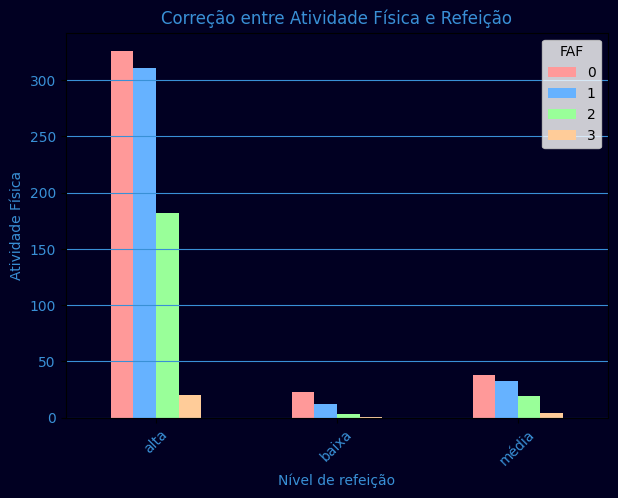

In [38]:
'''Desta análise podemos tirar a conclusão de que a obesidade pode esta ligada a falta de atividade fisica e alto consumo de refeições.
Como podemos ver abaixo no gráfico, a quantidade pessoas que não pratica atividade fisica está na coluna de nível de refeição alta.'''
tabela_correlaçao_FAF_NCP.plot(kind='bar', stacked=False, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'], figsize=(7,5))
plt.gca().set_facecolor(cor_de_fundo)
plt.gcf().set_facecolor(cor_de_fundo)
plt.title('Correção entre Atividade Física e Refeição', color=cor_dos_parametros)
plt.xlabel('Nível de refeição',color=cor_dos_parametros)
plt.ylabel('Atividade Física',color=cor_dos_parametros)
plt.xticks(rotation=45, color=cor_dos_parametros)
plt.yticks(color=cor_dos_parametros)
plt.grid(axis='y', color=cor_dos_parametros) 
plt.show()

Será que a obesidade é mais comum em qual faixa etária de idade?

In [39]:
#definindo o intervalo de classe
bins= np.arange(15, 53, 3)
#criando os rotulos
labels = [f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)]
labels


['15 - 18',
 '18 - 21',
 '21 - 24',
 '24 - 27',
 '27 - 30',
 '30 - 33',
 '33 - 36',
 '36 - 39',
 '39 - 42',
 '42 - 45',
 '45 - 48',
 '48 - 51']

In [40]:
#definindo a frequencia e passando os parametros como bins e labels.
cut  = pd.cut(dataset_obesos['Age'], bins=bins, labels=labels, include_lowest=True)
frequencia = cut.value_counts().sort_index()
frequencia

Age
15 - 18     89
18 - 21    183
21 - 24    198
24 - 27    262
27 - 30     93
30 - 33     44
33 - 36     13
36 - 39     53
39 - 42     28
42 - 45      7
45 - 48      1
48 - 51      0
Name: count, dtype: int64

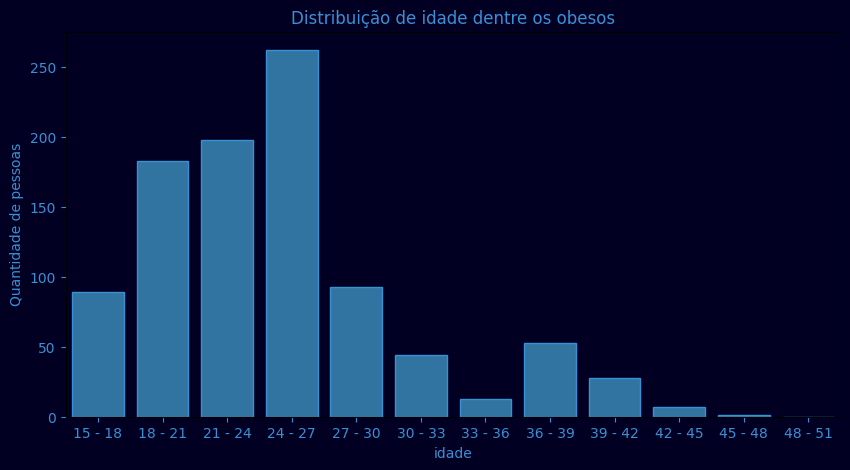

In [41]:
#Com isso podemos concluir que a idade de pessoas obesas está concentrada entre 24 anos e 27 anos de idade.
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=frequencia.index.astype(str), y=frequencia.values)
fig.patch.set_facecolor(cor_de_fundo)
ax.set_facecolor(cor_de_fundo)
ax.set_title('Distribuição de idade dentre os obesos', color=cor_dos_parametros)
ax.set_xlabel('idade', color=cor_dos_parametros)
ax.set_ylabel('Quantidade de pessoas', color=cor_dos_parametros)
ax.tick_params(colors=cor_dos_parametros)
for patch in ax.patches:
    patch.set_edgecolor(cor_dos_parametros)
plt.show()

In [42]:
for data in df_obesidade['FAF_cat']:
    if data == 'alta':
        pratica_atividade_fisica_alta = df_obesidade.loc[df_obesidade['FAF_cat'] == data]
    elif data == 'média':
        pratica_atividade_fisica_media = df_obesidade.loc[df_obesidade['FAF_cat'] == data]
    else:
        pratica_atividade_fisica_baixa = df_obesidade.loc[df_obesidade['FAF_cat'] == data ]

In [43]:
calc_porcentagem_alta = (pratica_atividade_fisica_alta.shape[0] / df_obesidade.shape[0] ) * 100
calc_porcentagem_media = (pratica_atividade_fisica_media.shape[0] / df_obesidade.shape[0] ) * 100
calc_porcentagem_baixa = (pratica_atividade_fisica_baixa.shape[0] / df_obesidade.shape[0] ) * 100
lista_rotulos = ['Alta','Média','Baixa']
lista_calculos = [calc_porcentagem_alta, calc_porcentagem_media,calc_porcentagem_baixa]

print(f'Cerca de {calc_porcentagem_alta:.2f}% das pessoas pratica atividade fisica alta')
print(f'Cerca de {calc_porcentagem_media:.2f}% das pessoas pratica atividade fisica media')
print(f'Cerca de {calc_porcentagem_baixa:.2f}% das pessoas pratica atividade fisica baixa')

Cerca de 17.81% das pessoas pratica atividade fisica alta
Cerca de 23.21% das pessoas pratica atividade fisica media
Cerca de 58.98% das pessoas pratica atividade fisica baixa


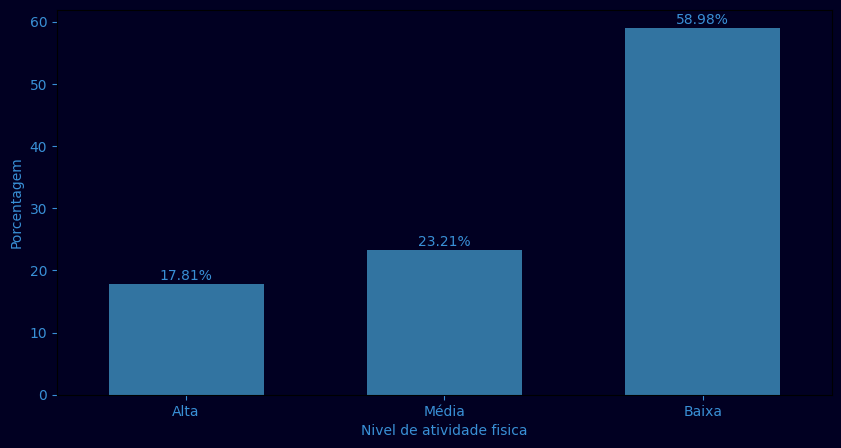

In [44]:
'''Observa-se que quase 60% da população analisada apresenta baixo nível de atividade física. 
O que pode ser um fator de risco significativo para o desenvolvimento da obesidade.'''
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=lista_rotulos, y=lista_calculos, width=0.6)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 6), 
                textcoords='offset points', color=cor_dos_parametros)

fig.patch.set_facecolor(cor_de_fundo)
ax.set_facecolor(cor_de_fundo)
ax.set_xlabel('Nivel de atividade fisica', color=cor_dos_parametros)
ax.set_ylabel('Porcentagem', color=cor_dos_parametros)
ax.tick_params(colors=cor_dos_parametros)
plt.show()

Análise Exploratória com Impacto

Durante a análise exploratória, encontramos padrões relevantes:
Cerca de 60% da população analisada possui baixo nível de atividade física.
Pessoas que consomem muita caloria entre refeições apresentam maior taxa de obesidade.
O consumo de vegetais e ingestão de água demonstraram uma forte correlação com a ausência de obesidade.
O uso de transporte ativo (como caminhada ou bicicleta) foi mais comum entre indivíduos com peso saudável.
Esses achados são visualizados por meio de gráficos de barras, heatmaps de correlação e histogramas que mostram a distribuição das variáveis.


Conclusão.

Concluímos que hábitos simples, como beber mais água, praticar atividade física regularmente e monitorar o consumo calórico, têm papel crucial na prevenção da obesidade.
Transformar dados em conhecimento prático nos permite tomar decisões mais conscientes. E aqui, a ciência de dados mostrou o caminho para entender e combater a obesidade de forma preditiva e preventiva
